## Requirements
#### In order to perform an analysis through this file, result tables must already be included in the EvalResults folder.
#### Results tables that already exist in the folder were generated through the work of the authors.
#### Originally, those tables can be generated by running 2.x.Select_Name.py (ex, 2.3.Select_BestRCFR.py or 2.6.Select_BestRCFR_AC_W1.py).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
import seaborn as sns
from numpy import mean as npMean
import re
from Module.MetricsGroup import DoAggMetric, DoSimEval
NumGene_CL = 100


### Metric table load

In [2]:
ModelList = ['CFR', 'RCFR', 'RCFR_AC_W:1', 'RCFR_AC_W:2', 'RCFR_AC_W:3' ]

DIR = './EvalResults/'

MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'AggMetricRank' in i and str(NumGene_CL) in i ]

PosMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Pos' in i} 
NegMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Neg' in i} 

for i in PosMetTabDic:
    PosMetTabDic[i]['Model'] = i.replace('_Pos', '')
    
for i in NegMetTabDic:
    NegMetTabDic[i]['Model'] = i.replace('_Neg', '')


### Metric table merge

In [3]:
PosMetricTotal = pd.concat(PosMetTabDic).reset_index(drop=True)
NegMetricTotal = pd.concat(NegMetTabDic).reset_index(drop=True)

PosMetricTotal['Model'] = PosMetricTotal['Model'].replace({'_NoCL_W1':'$_{NoCL}$', '_NoSIM_W1':'$_{NoSim}$', '_NoGROM':'$_{NoGROM}$' ,'_W1':'$_{W:1}$', '_W2':'$_{W:2}$', '_W3':'$_{W:3}$', }, regex=True)
NegMetricTotal['Model'] = NegMetricTotal['Model'].replace({'_NoCL_W1':'$_{NoCL}$', '_NoSIM_W1':'$_{NoSim}$', '_NoGROM':'$_{NoGROM}$' ,'_W1':'$_{W:1}$', '_W2':'$_{W:2}$', '_W3':'$_{W:3}$', }, regex=True)


NegMetricTotal.columns = [i.replace('Neg','') for i in NegMetricTotal.columns.tolist()]
PosMetricTotal.columns = [i.replace('Pos','') for i in PosMetricTotal.columns.tolist()]

NegMetricTotal['Sign'] = 'Negative'
PosMetricTotal['Sign'] = 'Positive'
Agg_MetricTotal = pd.concat([PosMetricTotal, NegMetricTotal], axis=0)

## Performance plot for both Patient and Gene-side  

In [4]:
def PerformancebyModel (TestColName, TestLabelName, MetricTotal, ModelList, TitleList, Leg=True):
    plt.figure(figsize=(20,10))

    
    #sns.set_theme(style="darkgrid")
    
    for numi, i in enumerate(TestColName):
        plt.subplot(2,2,numi+1)
        #sns.violinplot(x='Model' ,y=i, scale="width", data=MetricTotal, cut=0,  order=ModelList)
        #sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, color='lightseagreen', order=ModelList,linestyles='-', capsize=0.1, err_style='bars',errwidth=1.5)

        if numi != 0:
            ax = sns.swarmplot(x="Model", y=i, data=MetricTotal, order=ModelList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='Sign')
            sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, order=ModelList,
                          capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='Sign', linestyles=["-", "--"], scale=1.)
            handles, labels = ax.get_legend_handles_labels()
            ax.legend_.remove()
        else:
            ax = sns.swarmplot(x="Model", y=i, data=MetricTotal, order=ModelList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='Sign')
            sns.pointplot(x ='Model', y=i, data=MetricTotal, estimator=npMean, order=ModelList,
                          capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='Sign', linestyles=["-", "--"], scale=1.)
            handles, labels = ax.get_legend_handles_labels()
            #ax.legend(handles[:2], labels[:2],bbox_to_anchor=(1.25, 0.65), loc=0, ncol=1,  prop={'size': 14})
            
            if Leg:
                ax.legend(handles[:2], labels[:2], prop={'size': 18})
            else:
                ax.legend_.remove()
 

        plt.xticks(fontsize=18, rotation=20)
        plt.yticks(fontsize=18, rotation=10)
        plt.xlabel('', size=20, labelpad=10)
        plt.title(TitleList[numi], size=24, pad=13)
        plt.ylabel(TestLabelName[numi], size=20 )
        #plt.ylim(bottom=-0.05)
        plt.subplots_adjust(hspace=0.5,wspace=0.15)

C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


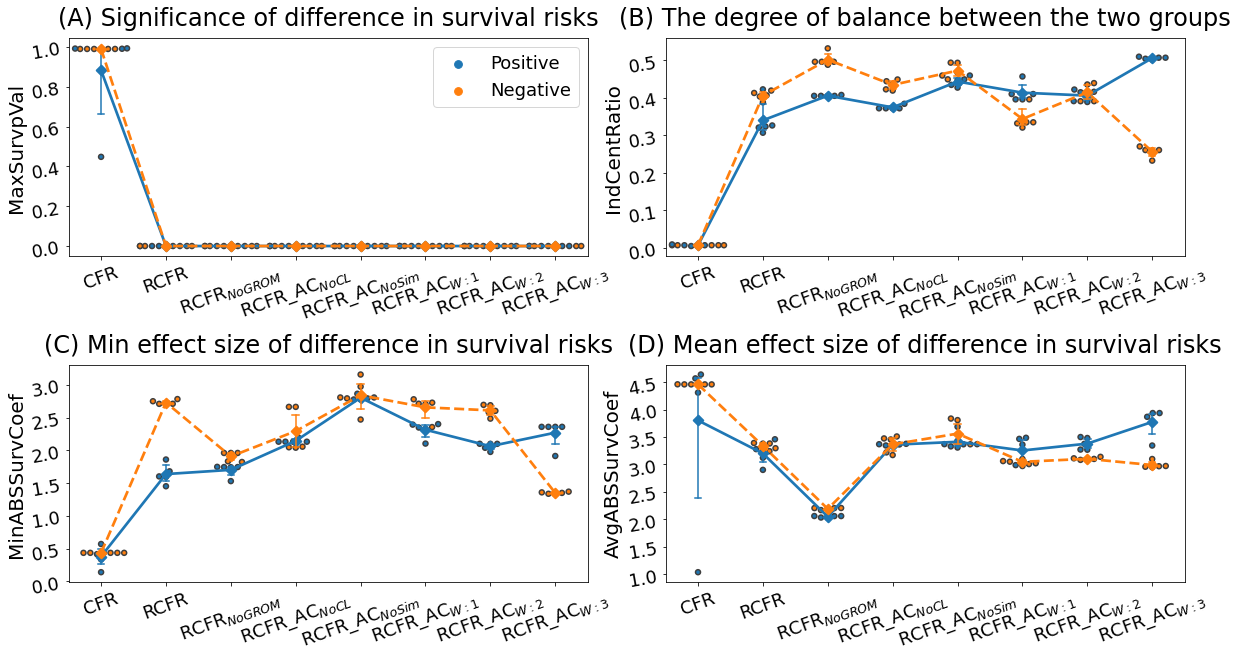

In [5]:
TestColName = ['MaxSurvpVal', 'IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef']
TestLabelName = ['MaxSurvpVal', 'IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef']
TitleList = ['(A) Significance of difference in survival risks',
          '(B) The degree of balance between the two groups',
          '(C) Min effect size of difference in survival risks',
          '(D) Mean effect size of difference in survival risks']

PerformancebyModel(TestColName, TestLabelName, Agg_MetricTotal, np.unique(PosMetricTotal['Model']).tolist(), TitleList, True)
plt.savefig('./Figures/PatientSide_Performance.png')


C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\envs\py38_gpu\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


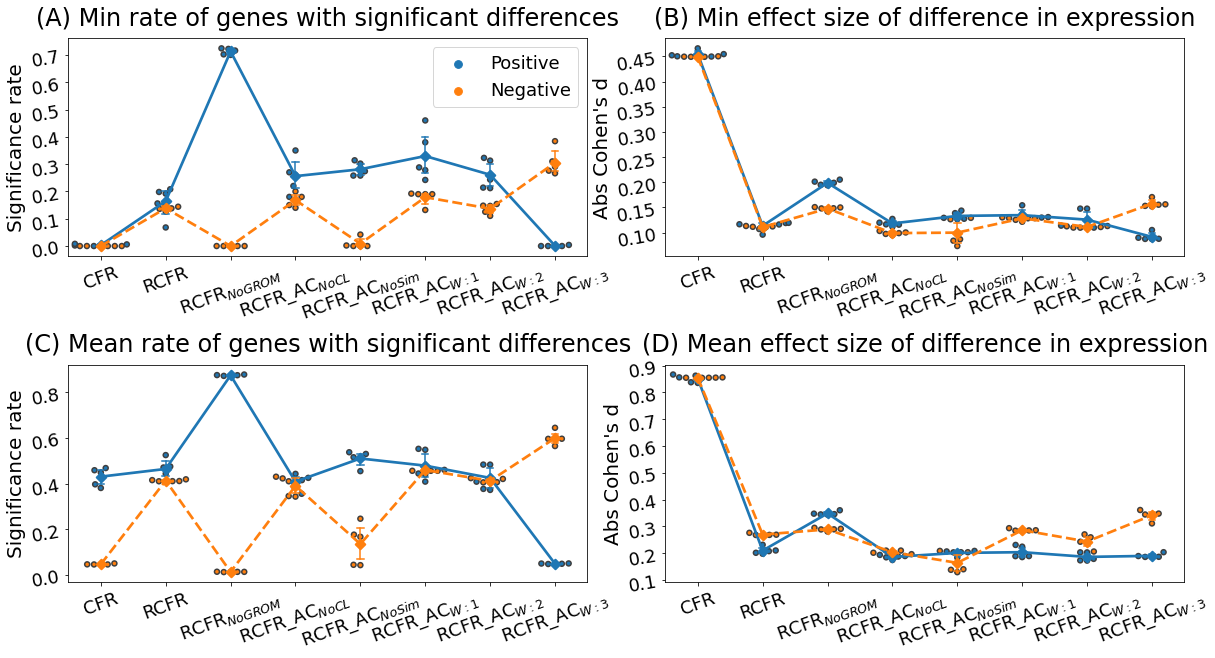

In [6]:
TestColName = ['MinSigRate', 'MinABSGeCohD','AvgSigRate', 'AvgABSGeCohD' ]
TestLabelName = ["Significance rate", "Abs Cohen's d", "Significance rate", "Abs Cohen's d"]
TitleList = ['(A) Min rate of genes with significant differences',
      '(B) Min effect size of difference in expression',
      '(C) Mean rate of genes with significant differences',
      '(D) Mean effect size of difference in expression']

PerformancebyModel(TestColName, TestLabelName, Agg_MetricTotal, np.unique(PosMetricTotal['Model']).tolist(), TitleList, True)
plt.savefig('./Figures/GeneSide_Performance.png')


## Performance table

In [7]:
Cols = ['MaxSurvpVal', 'IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef' , 'MinSigRate', 'AvgSigRate','MinABSGeCohD', 'AvgABSGeCohD']
RateCols = ['IndCentRatio','MinSigRate', 'AvgSigRate']
PerformanceTable = Agg_MetricTotal.groupby(['Sign','Model']).mean()[Cols]
PerformanceTable[RateCols] = PerformanceTable[RateCols]*100
PerformanceTable = np.round(PerformanceTable, 3)
PerformanceTable[RateCols] = PerformanceTable[RateCols].astype('str')+ '%'

PerformanceTable['MaxSurvpVal'] = PerformanceTable['MaxSurvpVal'].astype('str')
PerformanceTable['MaxSurvpVal'] = PerformanceTable['MaxSurvpVal'].replace({'0.0':'p<0.001'})
PerformanceTable.to_csv('./EvalResults/PerformanceTable.csv')

### Data load for best model selection 

In [8]:
DIR = './EvalResults/'
MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'AggMetricRank' in i and str(NumGene_CL) in i ]
#MetricTableList = [i for i in MetricTableList if 'AggMetricRank' in i and str(NumGene_CL) in i and 'ACNOCOMX' not in i ]


PosMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Pos' in i} 
NegMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList if 'Neg' in i} 

PosMetricTotal = pd.concat(PosMetTabDic).reset_index(drop=True)
NegMetricTotal = pd.concat(NegMetTabDic).reset_index(drop=True)



### Model level filtering

In [9]:
SelectiveKeyword = 'M06'
ModelFilter = [SelectiveKeyword in i.Model for i in NegMetricTotal.iloc]
NegMetricSelected = NegMetricTotal[ModelFilter]

ModelFilter = [SelectiveKeyword in i.Model for i in PosMetricTotal.iloc]
PosMetricSelected = PosMetricTotal[ModelFilter]


### Best model selection

In [10]:
def Aggregation(MetricTable,AggMetricList):
    
    AggMetricRank = DoAggMetric(AggMetricList, MetricTable[['Model']+AggMetricList]).sort_values('Metrics')
    AggMetricRank = pd.merge(AggMetricRank, MetricTable[['Model','MaxSurvpVal']], on='Model', how='left')
    BestModel = AggMetricRank.sort_values('Metrics').iloc[-1]

    return AggMetricRank, BestModel

In [11]:
pCutoff = 0.005
ExcRate = 0.2
NmodEahG = 1

NegMetricList = ['IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef',  'MinNegSigRate', 'AvgNegSigRate', 'MinABSGeCohD', 'AvgABSGeCohD']
PosMetricList = ['IndCentRatio', 'MinABSSurvCoef', 'AvgABSSurvCoef', 'MinPosSigRate', 'AvgPosSigRate', 'MinABSGeCohD', 'AvgABSGeCohD']


NegAggMetricRank, NegBestModel =  Aggregation(NegMetricSelected, NegMetricList)
PosAggMetricRank, PosBestModel =  Aggregation(PosMetricSelected, PosMetricList)

NegBestModel, PosBestModel

(Model                 M06_RCFR_AC_W1_S1_Epo27.hdf5
 IndCentRatio                              0.334755
 MinABSSurvCoef                            2.714576
 AvgABSSurvCoef                            3.022044
 MinNegSigRate                                 0.19
 AvgNegSigRate                               0.4685
 MinABSGeCohD                              0.128721
 AvgABSGeCohD                              0.293345
 NormIndCentRatio                          0.186986
 NormMinABSSurvCoef                        0.840774
 NormAvgABSSurvCoef                        0.162909
 NormMinNegSigRate                         0.966667
 NormAvgNegSigRate                              1.0
 NormMinABSGeCohD                          0.700872
 NormAvgABSGeCohD                               1.0
 Metrics                                   4.858209
 MaxSurvpVal                                    0.0
 Name: 4, dtype: object,
 Model                 M06_RCFR_AC_W1_S1_Epo55.hdf5
 IndCentRatio                          

In [12]:
np.save('./ModelResults/NegBestModel_name.npy', NegBestModel.Model)
np.save('./ModelResults/PosBestModel_name.npy', PosBestModel.Model)

### Performance difference by sign over epochs

In [13]:
DIR = './EvalResults/'
MetricTableList = os.listdir(DIR)
MetricTableList = [i for i in MetricTableList if 'MetricTable' in i and str(NumGene_CL) in i ]
MetTabDic = {i.replace('MetricTable_', '').replace('Filt'+str(NumGene_CL)+'.csv', '') : pd.read_csv(DIR+i) for i in MetricTableList} 


for i in MetTabDic:
    MetTabDic[i]['Model'] = i
    
MetTabDic = pd.concat(MetTabDic).reset_index(drop=True)


In [14]:
def ToLongSigRate (Data):
    
    LongMetTabDic =  pd.melt(Data, id_vars=['Model','EpNum'], value_vars=['AvgNegSigRate','AvgPosSigRate','MinNegSigRate','MinPosSigRate']).copy()
    LongMetTabDic = LongMetTabDic.rename(columns={'value':'Rate'})

    LongMetTabDic['Metric'] = 'Min'
    LongMetTabDic['Sign'] = 'Neg.'

    LongMetTabDic.loc[LongMetTabDic['variable'].str.contains('Avg'), 'Metric'] = 'Mean'
    LongMetTabDic.loc[LongMetTabDic['variable'].str.contains('Pos'), 'Sign'] = 'Pos.'
    
    return LongMetTabDic


def ToLongSurvSig (Data):
    
    LongMetTabDic =  pd.melt(Data, id_vars=['Model','EpNum'], value_vars=['MaxSurvpVal']).copy()
    LongMetTabDic['Span'] = LongMetTabDic['value'] < 0.05
    LongMetTabDic = LongMetTabDic.groupby('EpNum').mean().reset_index()
    LongMetTabDic['Span'] = LongMetTabDic['Span']==1

    
    return LongMetTabDic

ModelList = np.unique(MetTabDic['Model'])
MetTabDicSigRate = {i:ToLongSigRate(MetTabDic[MetTabDic['Model']==i]) for i in ModelList}
MetTabDicSurvSig = {i:ToLongSurvSig(MetTabDic[MetTabDic['Model']==i]) for i in ModelList}


### Visualization

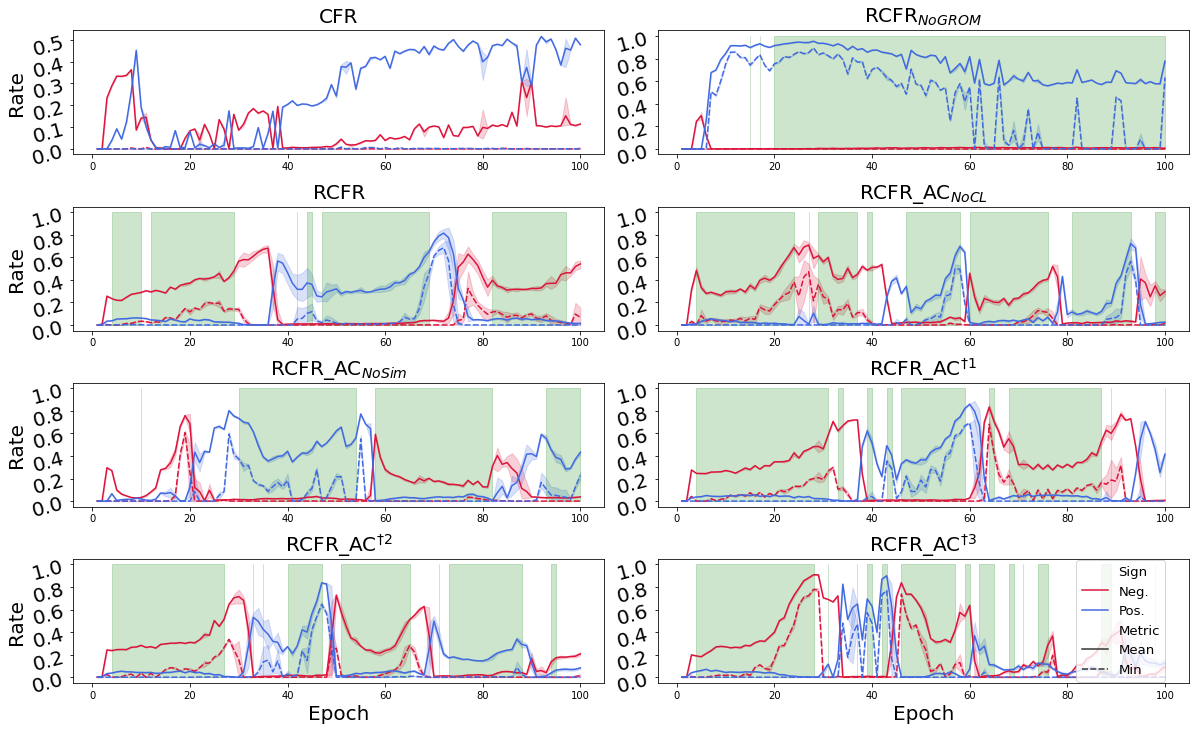

In [15]:
ModelListOrder = ['CFR_', 'RCFR_NoGROM_', 'RCFR_', 'RCFR_AC_NoCL_W1_', 'RCFR_AC_NoSIM_W1_', 'RCFR_AC_W1_', 'RCFR_AC_W2_', 'RCFR_AC_W3_',    ]
ModelListLabel = ['CFR', 'RCFR$_{NoGROM}$', 'RCFR', 'RCFR_AC$_{NoCL}$', 'RCFR_AC$_{NoSim}$', 'RCFR_AC$^{†1}$', 'RCFR_AC$^{†2}$', 'RCFR_AC$^{†3}$']


plt.figure(figsize=(20, 12))

for numi, i in enumerate(ModelListOrder):
    plt.subplot(4,2,numi+1)
    
    if numi != len(ModelListOrder)-1:
        sns.lineplot(x="EpNum", y="Rate", data=MetTabDicSigRate[i], hue='Sign', palette=['crimson','royalblue'], style='Metric', legend=False)
        plt.fill_between(MetTabDicSurvSig[i]['EpNum'], 0,1, where=MetTabDicSurvSig[i]['Span'], color='g', alpha=0.2)
    else:
        sns.lineplot(x="EpNum", y="Rate", data=MetTabDicSigRate[i], hue='Sign', palette=['crimson','royalblue'], style='Metric', legend=True)
        plt.fill_between(MetTabDicSurvSig[i]['EpNum'], 0,1, where=MetTabDicSurvSig[i]['Span'], color='g', alpha=0.2)
        plt.legend(bbox_to_anchor=(0.788, 0.99), loc=2, borderaxespad=0., prop={'size': 13.2}, ncol=1)    
        #plt.legend(bbox_to_anchor=(0.00, -0.3), loc=2, borderaxespad=0., prop={'size': 13}, ncol=2, title='')    
        #plt.legend(prop={'size': 13}, ncol=1)    
        
        
    if numi >= len(ModelListOrder)-2:
        plt.xlabel('Epoch', size=20)
    else:
        plt.xlabel('')
            
    if numi % 2 ==0:
        plt.ylabel('Rate', size=20 )
    else:
        plt.ylabel('')
    
    plt.title(ModelListLabel[numi], size=20, pad=8)
    plt.yticks(fontsize=20, rotation=15)
    
    plt.subplots_adjust(hspace=0.42,wspace=0.1)

    
plt.savefig('./Figures/SigPerformance_epoch.png')

### Performance difference by clustering size 

In [16]:
def PerformancebyNumGene_CL (TestColName, TestLabelName, MetricTotal, SignList, AxisList, TitleList):
    plt.figure(figsize=(20,11))

    IMNum = 0
    for numj, j in enumerate(TestColName):
        for numi, i in enumerate(SignList):
            plt.subplot(len(SignList),len(TestColName),IMNum+1)

            if IMNum != 3:
                ax = sns.swarmplot(x='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], palette=['green','orange'], order=AxisList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='GroupM')
                sns.pointplot(x ='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], estimator=npMean, order=AxisList, palette=['green','orange'],
                              capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='GroupM', linestyles=["-", "-"], scale=0.8)
                handles, labels = ax.get_legend_handles_labels()
                ax.legend_.remove()
            else:
                ax = sns.swarmplot(x='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], palette=['green','orange'], order=AxisList, size=5, alpha=1., linewidth=1.5, edgecolor='gray', zorder=1, hue='GroupM')
                sns.pointplot(x ='NumGene_CL', y=j, data=MetricTotal[MetricTotal['Sign']==i], estimator=npMean, order=AxisList, palette=['green','orange'],
                              capsize=0.1, err_style='bars',errwidth=1.5, markers='D', hue='GroupM', linestyles=["-", "-"], scale=0.8)
                handles, labels = ax.get_legend_handles_labels()
                ax.legend(handles[:2], labels[:2],bbox_to_anchor=(1., 0.4), loc=0, ncol=1,  prop={'size': 16})

            if IMNum >= 2:
                ax.set_xlabel('The max number of genes in a cluster (Kn)', size=20, labelpad=5)
            else:
                ax.set_xlabel('', size=1, labelpad=5)

            plt.xticks(fontsize=20, rotation=15)
            plt.yticks(np.arange(0, 0.8, step=0.1), fontsize=20, rotation=15)
            ax.set_ylabel(TitleList[numj], size=20 )
            
            plt.subplots_adjust(hspace=0.45,wspace=0.14)
            plt.title(SignList[numi],fontsize=20, pad=10)
            IMNum += 1

In [17]:
DIR = './EvalResults/'
MetricTableList = os.listdir(DIR)
MetricTableList1 = [i for i in MetricTableList if 'AggMetricRank' in i and 'RCFR_AC' in i and 'W1' in i and 'No' not in i ]
MetricTableList2 = [i for i in MetricTableList if 'AggMetricRank' in i and 'RCFR_AC_NoCL' in i ] 
MetricTableList= MetricTableList1 + MetricTableList2

PosMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+re.findall('.\d+', i)[1][1:]+'.csv', '_'+re.findall('.\d+', i)[1][1:]) : pd.read_csv(DIR+i) for Num, i in enumerate(MetricTableList)  if 'Pos' in i} 
NegMetTabDic = {i.replace('AggMetricRank_', '').replace('_Filt'+re.findall('.\d+', i)[1][1:]+'.csv', '_'+re.findall('.\d+', i)[1][1:]) : pd.read_csv(DIR+i) for Num, i in enumerate(MetricTableList)  if 'Neg' in i} 

for Tab in PosMetTabDic:
    PosMetTabDic[Tab]['NumGene_CL'] = re.findall('.\d+', Tab)[1][1:]
for Tab in NegMetTabDic:
    NegMetTabDic[Tab]['NumGene_CL'] = re.findall('.\d+', Tab)[1][1:]
    
PosMetricTotal = pd.concat(PosMetTabDic).reset_index(drop=True)
NegMetricTotal = pd.concat(NegMetTabDic).reset_index(drop=True)
NegMetricTotal['Sign'] = 'Negative'
PosMetricTotal['Sign'] = 'Positive'

NegMetricTotal.columns = [i.replace('Neg','') for i in NegMetricTotal.columns.tolist()]
PosMetricTotal.columns = [i.replace('Pos','') for i in PosMetricTotal.columns.tolist()]

Agg_MetricTotal = pd.concat([PosMetricTotal, NegMetricTotal], axis=0).copy()
Agg_MetricTotal['GroupM'] = 'RCFR_AC'+'$^{†1}$'
Agg_MetricTotal.loc[Agg_MetricTotal['Model'].str.contains('NoCL'), 'GroupM'] = 'RCFR_AC'+'$_{NoCL}$'
SignList = np.unique(Agg_MetricTotal['Sign'])
AxisList = np.unique(Agg_MetricTotal['NumGene_CL']).tolist()
TestColName = ['MinSigRate', 'AvgSigRate']
TestLabelName = ["Significance rate","Significance rate"]
TitleList = ['Min sig. rate', 'Mean sig. rate' ]

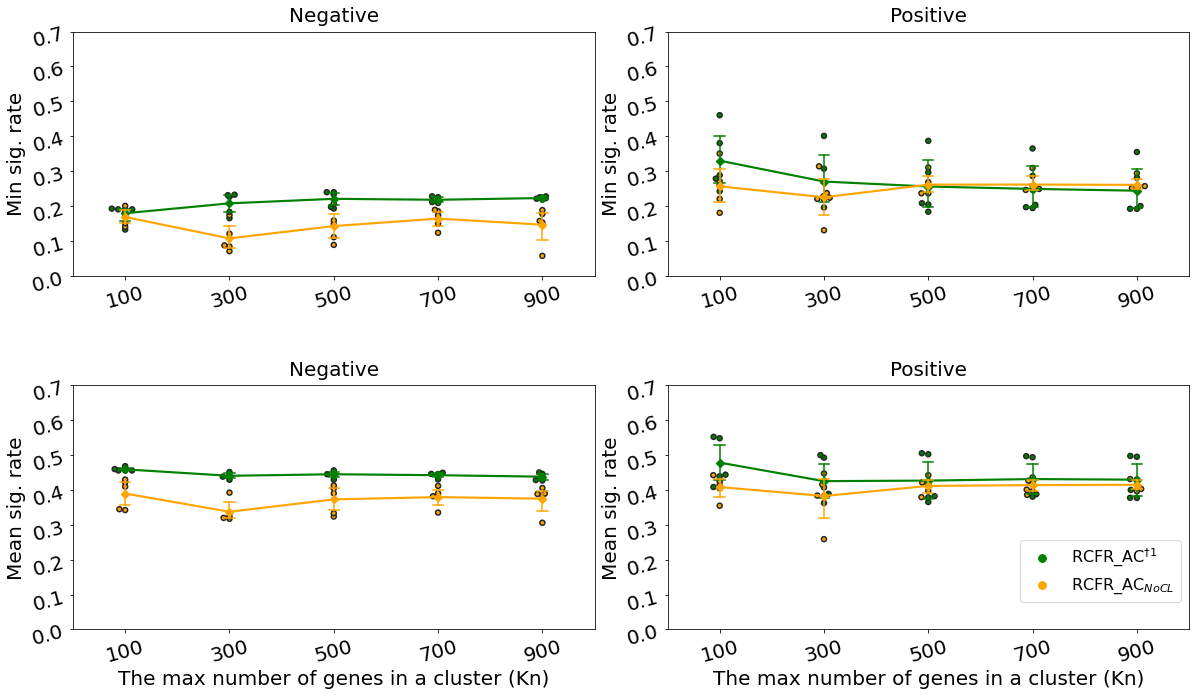

In [18]:
PerformancebyNumGene_CL(TestColName, TestLabelName, Agg_MetricTotal, SignList, np.unique(Agg_MetricTotal['NumGene_CL']).tolist(), TitleList)
plt.savefig('./Figures/PerformanceCompbyNumGene_CL.png')